## INTRODUCTION

The first half of this project is stored in two python files (main routine and helpers). You can read through those files included on Github. They use a browser driver (Selenium) to scrape job data from Glassdoor. Since a single pass through data science jobs took ~4 hrs for me, I dumped the results of the search and pandas Dataframe into a pickle file to "archive" the search.

This part of the project will be devoted to the analysis of the data that I scraped and will start by unpacking the pickle files.

In [1]:
%matplotlib inline

In [2]:
import pickle
import matplotlib.pyplot as plt

raw_results_file = "results.pickle"
skills_dataframe_file = "skills_df.pickle"

In [3]:
file_object = open(raw_results_file, 'rb')
results = pickle.load(file_object)
file_object.close()

file_object = open(skills_dataframe_file, 'rb')
skills_df = pickle.load(file_object)
file_object.close()

Let's see what's in the pickles!

In [4]:
print("The results variable is a %s with %d entries." % (type(results), len(results)))
print("Here's an example entry:")
results[1]

The results variable is a <class 'dict'> with 1519 entries.
Here's an example entry:


{'company': 'Amazon',
 'description': 'Job Description\nAlexa is the groundbreaking, cloud-based intelligent agent that powers Echo and other devices designed around your voice. Our team is creating the science and technology behind Alexa. Come join us! Our goal is to delight our customers by adding new features to Alexa and by improving the accuracy of our existing speech recognition and natural language processing systems.\n\nAs a Data Scientist, you will be responsible for the natural language understanding models in one of our feature domains. Your work will directly impact our customers in the form of novel products and services that make use of speech and language technology.\nYou will:\nOwn the customer-facing machine learning and deterministic models for a specific domain of features,\nBuild and release new models that elevate the customer experience and track the impact over time,\nPropose new modeling solutions and run experiments to prove their efficacy,\nCollaborate with co

In [5]:
print("The skills_df variable is a %s with %d entries." % (type(skills_df), len(skills_df)))
print("Here's the head of the Dataframe:")
skills_df.head()

The skills_df variable is a <class 'pandas.core.frame.DataFrame'> with 52 entries.
Here's the head of the Dataframe:


,Term,NumPostings
1,Python,376
31,SQL,328
38,Statistics,286
0,R,268
48,Bachelor,235


In [6]:
#set figure size settings for plot
fig_size = [12, 6]
plt.rcParams["figure.figsize"] = fig_size

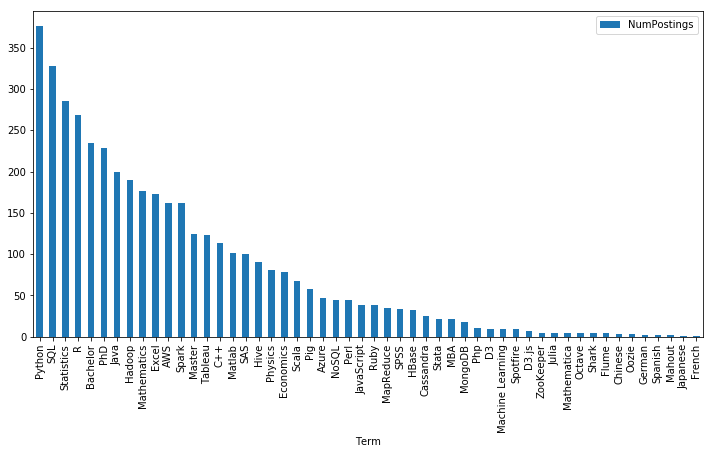

In [7]:
skills_df.plot(x='Term', y='NumPostings', kind='bar')

## 80/20 Analysis

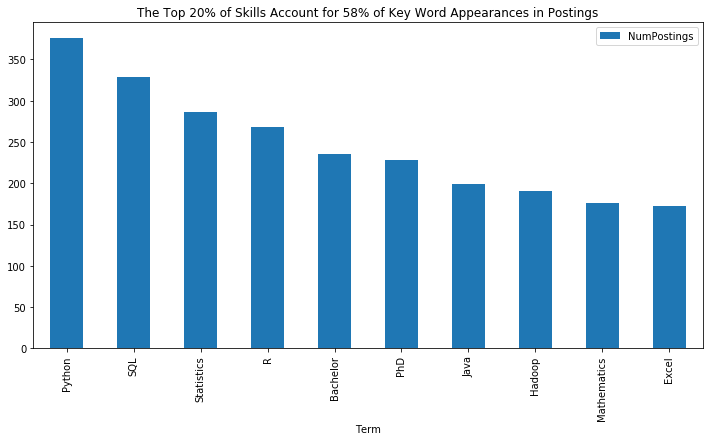

In [8]:
#calculate top 20% of skills
top_skills = int(len(skills_df)*.2)
#calculate percentage of postings made up by top 20% of skills
num_postings_top_skills = skills_df[:top_skills].NumPostings.sum() / skills_df.NumPostings.sum()
title = "The Top 20% of Skills Account for " + str(round(num_postings_top_skills*100)) + "% of Key Word Appearances in Postings"
skills_df[:top_skills].plot(x='Term', y='NumPostings', kind='bar', title=title)

**Summary:** Although a bit under the expectation of the 80/20 rule, the top 20 skills skill account for a fairly highly disporportionate appearances of key words in job postings. Python, SQL, and R are must-have skills, while candidates would be wise to invest time in learning Hadoop as well. Stats and Math are the top educational backgrounds to have.

## To Be Continued..